In [7]:
import cython
import numpy as np
import numpy.ma as ma
import corner
import matplotlib.pyplot as plt
import emcee
from RC_2D_Fit_Functions import Galaxy_Data, getTidal
from Velocity_Map_Functions_cython import rot_incl_iso
from astropy.io import fits

In [8]:
scale = scale = 0.22471093 

# Isothermal

In [9]:
bad_samples_iso = np.load("bad_samples_iso.npy")
bad_samples_iso

array([[[ 1.06714630e+00, -7.08942671e-04,  1.03102431e+03, ...,
          2.63727134e+01,  2.74426389e+01,  9.06504543e-01],
        [ 1.06753321e+00, -6.80572474e-04,  1.03102250e+03, ...,
          2.63711937e+01,  2.74426860e+01,  9.07916932e-01],
        [ 1.06767257e+00,  1.86421790e-04,  1.03102316e+03, ...,
          2.63707298e+01,  2.74418388e+01,  9.06514042e-01],
        ...,
        [ 1.06753818e+00, -7.81433331e-04,  1.03102416e+03, ...,
          2.63724024e+01,  2.74419226e+01,  9.06530593e-01],
        [ 1.06651247e+00, -7.07288210e-04,  1.03102374e+03, ...,
          2.63721983e+01,  2.74424272e+01,  9.07533588e-01],
        [ 1.06715698e+00, -7.11525100e-04,  1.03102327e+03, ...,
          2.63712763e+01,  2.74433064e+01,  9.07384714e-01]],

       [[ 1.06714630e+00, -7.08942671e-04,  1.03102431e+03, ...,
          2.63727134e+01,  2.74426389e+01,  9.06504543e-01],
        [ 1.06753321e+00, -6.80572474e-04,  1.03102250e+03, ...,
          2.63711937e+01,  2.74426860e

In [10]:
ns_iso, nw_iso, nd_iso = bad_samples_iso.shape
ns_iso, nw_iso, nd_iso

(10000, 64, 11)

In [11]:
flat_bad_samples_iso = bad_samples_iso.reshape(ns_iso*nw_iso, nd_iso)
flat_bad_samples_iso

array([[ 1.06714630e+00, -7.08942671e-04,  1.03102431e+03, ...,
         2.63727134e+01,  2.74426389e+01,  9.06504543e-01],
       [ 1.06753321e+00, -6.80572474e-04,  1.03102250e+03, ...,
         2.63711937e+01,  2.74426860e+01,  9.07916932e-01],
       [ 1.06767257e+00,  1.86421790e-04,  1.03102316e+03, ...,
         2.63707298e+01,  2.74418388e+01,  9.06514042e-01],
       ...,
       [-8.97889003e-01,  2.86110977e+00,  6.70553011e+02, ...,
         2.63969816e+01,  2.74456427e+01,  6.32288402e-01],
       [-1.00188974e+00,  2.90631201e+00,  7.49952663e+02, ...,
         2.64777567e+01,  2.74352833e+01,  2.07826433e-01],
       [-6.79456126e+00,  1.20201577e+00,  1.06970185e+03, ...,
         2.63756384e+01,  2.74978907e+01,  6.54469284e-01]])

In [12]:
mini_soln_iso = [np.log10(11.66291723),2.69E-05,1031.023329,1.838768634,0.083546044,0.102759719,0.553854733,1.951500683,26.37172472,27.44266793,0.907424538]

In [13]:
pos_iso = np.array(mini_soln_iso) + np.random.uniform(low=-1e-3*np.ones(len(mini_soln_iso)), high=1e-3*np.ones(len(mini_soln_iso)), size=(64,11))

In [14]:
nwalkers_iso, ndim_iso = pos_iso.shape
nwalkers_iso, ndim_iso

(64, 11)

In [15]:
labels = ['rho_b','R_b', 'Sigma_d','R_d','rho_h','R_h','i','phi','x','y','vsys']

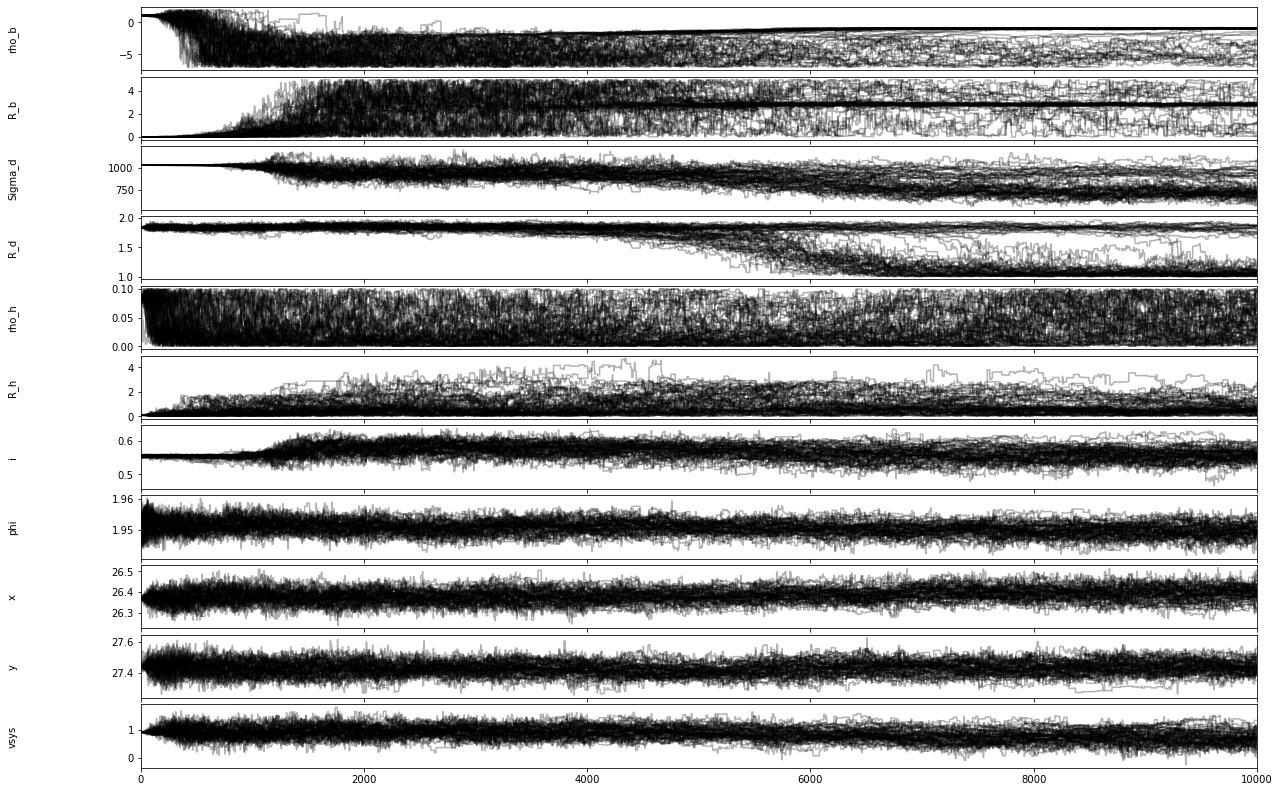

In [16]:
fig_iso, axes_iso = plt.subplots(11,1, figsize=(20, 14), sharex=True,
                         gridspec_kw={'hspace':0.1})

for i in range(ndim_iso):
    ax = axes_iso[i]
    ax.plot(bad_samples_iso[:10000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,10000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

In [17]:
good_walkers_iso = np.load("good_walkers_iso.npy")
bad_samples_iso = bad_samples_iso[:,good_walkers_iso,:]

In [18]:
flat_bad_samples_iso = bad_samples_iso.reshape(ns_iso*nw_iso, nd_iso)

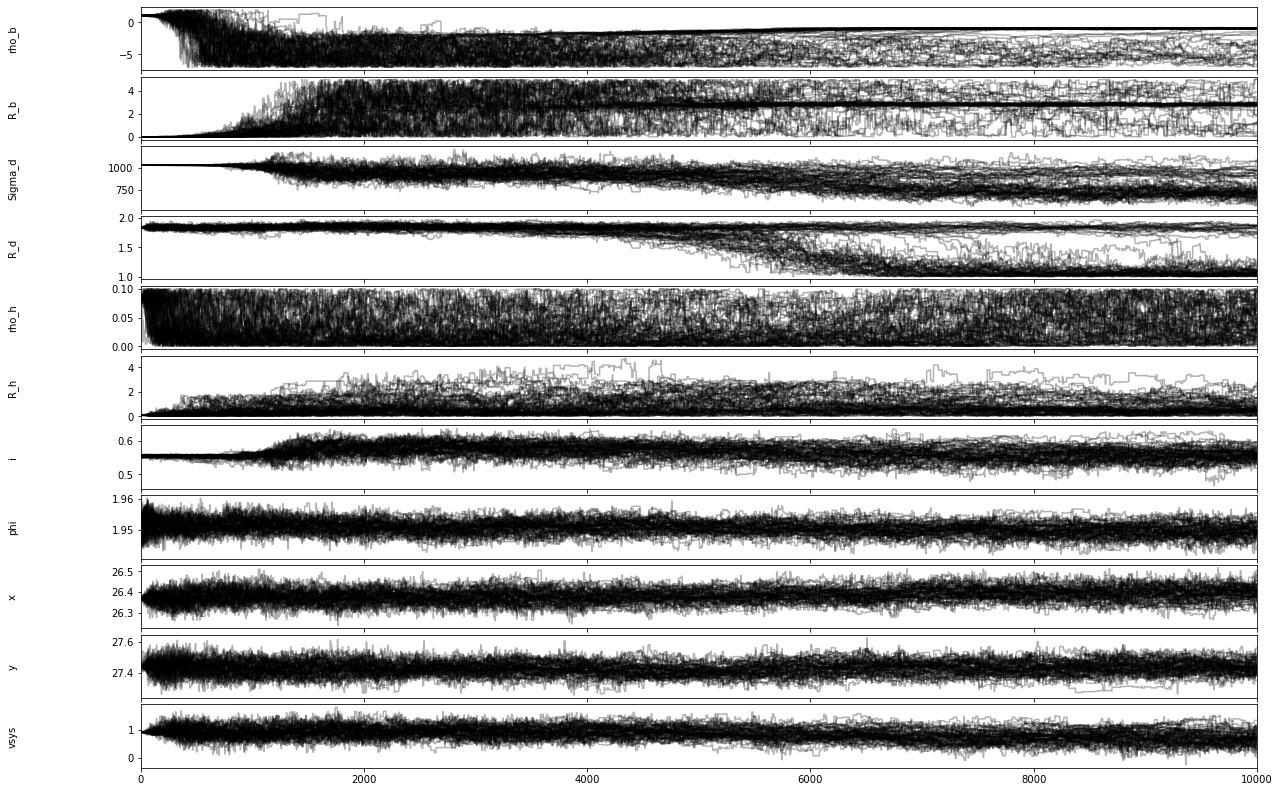

In [19]:
fig_iso, axes_iso = plt.subplots(11,1, figsize=(20, 14), sharex=True,
                         gridspec_kw={'hspace':0.1})

for i in range(ndim_iso):
    ax = axes_iso[i]
    ax.plot(bad_samples_iso[:10000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,10000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

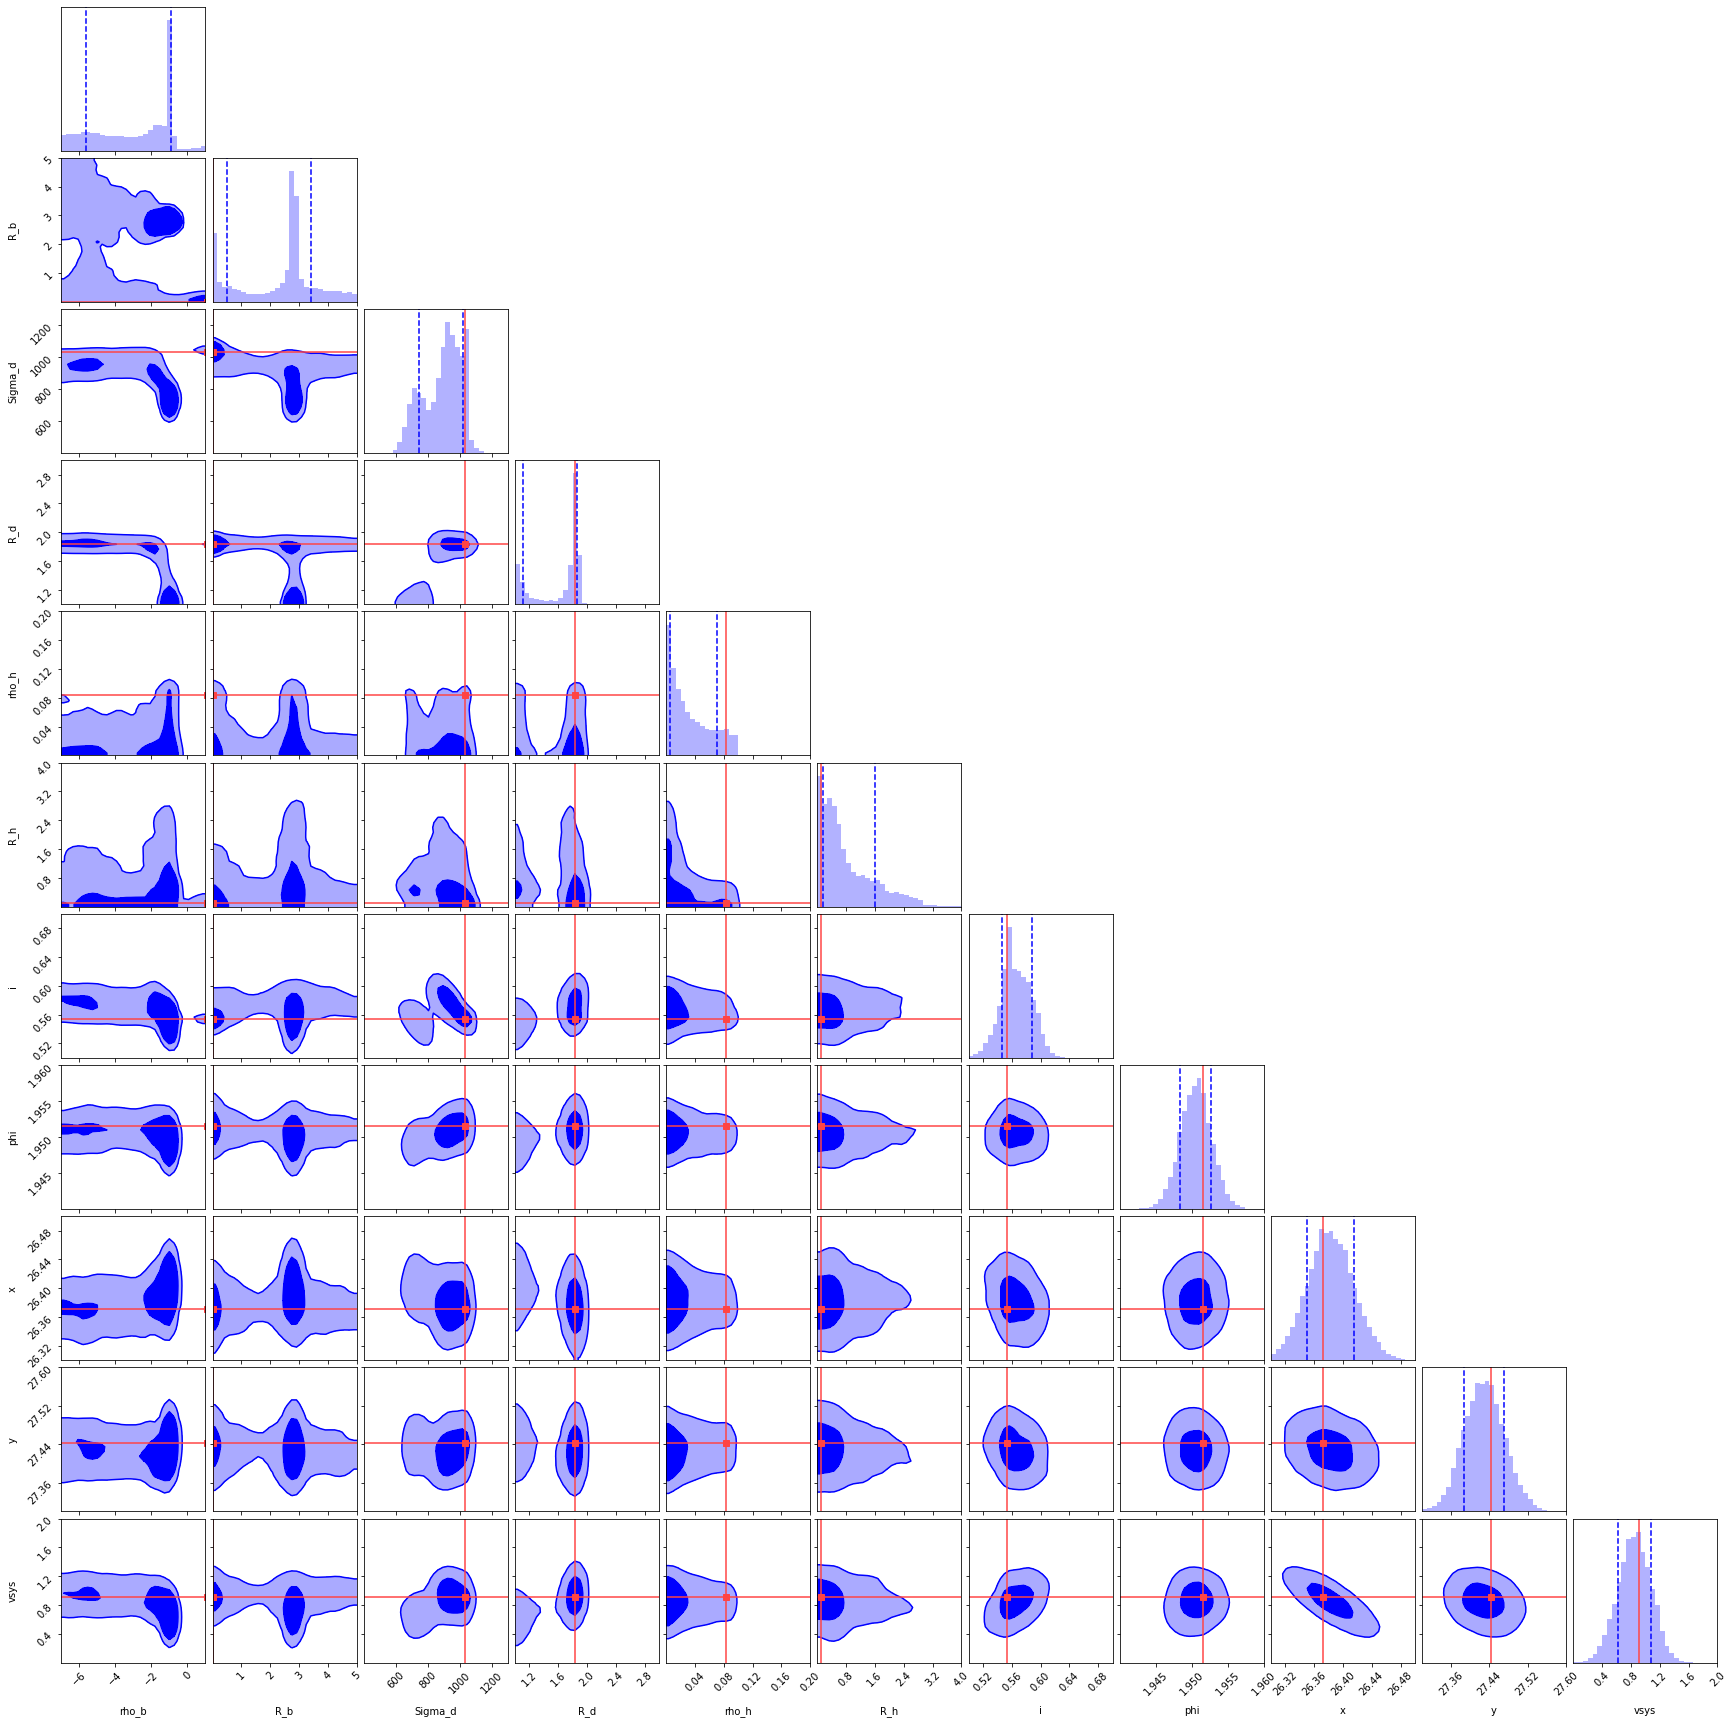

In [20]:
figure = corner.corner(flat_bad_samples_iso, labels=labels,
                    range=[(-7,1), (0,5), (400,1300),(1,3),(1e-10,.2),(1e-7,4),(.5,.7),(1.94,1.96),(26.3,26.5),(27.3,27.6),(0,2)], bins=30,smooth=1,
                    truths=mini_soln_iso, 
                    truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
                    quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True)
plt.savefig('corner_iso.png',format='png')

# Plotting resiudal

In [21]:
samples_mean = np.mean(flat_bad_samples_iso, axis=0)
samples_mean

array([-2.88251299e+00,  2.35272602e+00,  8.92377159e+02,  1.62645138e+00,
        3.38327506e-02,  8.21109244e-01,  5.65761385e-01,  1.95055272e+00,
        2.63829992e+01,  2.74293282e+01,  8.47266156e-01])

In [22]:
mini_soln_iso

[1.0668071935130132,
 2.69e-05,
 1031.023329,
 1.838768634,
 0.083546044,
 0.102759719,
 0.553854733,
 1.951500683,
 26.37172472,
 27.44266793,
 0.907424538]

In [23]:
from mapSmoothness_functions import how_smooth
import os.path
from os import path

MANGA_FOLDER_mac = '/Users/richardzhang/Documents/UR_Stuff/Research_UR/SDSS/dr16/manga/spectro/'
#MANGDA_FOLDER_bluehive = '/home/yzh250/Documents/UR_Stuff/Research_UR/SDSS/dr16/manga/spectro/'
DRP_FILENAME_mac = MANGA_FOLDER_mac + 'redux/v2_4_3/drpall-v2_4_3.fits'
#DRP_FILENAME_bluehive = MANGDA_FOLDER_bluehive + 'redux/v2_4_3/drpall-v2_4_3.fits'
VEL_MAP_FOLDER_mac = MANGA_FOLDER_mac + 'analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/'

MORPH_file_mac = '/Users/richardzhang/Documents/UR_Stuff/Research_UR/2D_RC/manga_visual_morpho-1.0.1.fits'
Mfile_mac = fits.open(MORPH_file_mac)
Mdata_mac = Mfile_mac[1].data

Text(0.5, 1.0, '7443-6101 data')

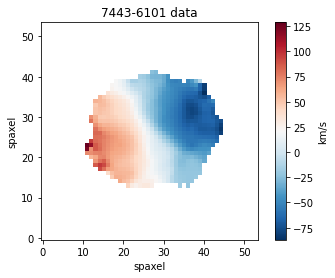

In [24]:
data_maps, gshape, x_center_guess, y_center_guess = Galaxy_Data('7443-6101',MANGA_FOLDER_mac)
data_map = data_maps['vmasked']
data_iso = plt.imshow(data_map,origin='lower',cmap='RdBu_r')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
cbar = plt.colorbar(data_iso)
cbar.set_label('km/s')
plt.title('7443-6101 data')

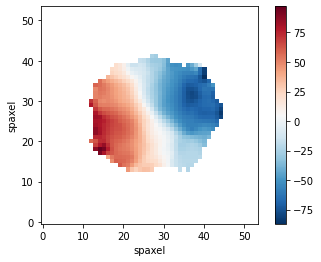

In [25]:
tidal = getTidal('7443-6101')

# Smoothness cut
max_map_smoothness = 1.85

map_smoothness = how_smooth(data_maps['Ha_vel'], data_maps['Ha_vel_mask'])

SN_map = data_maps['Ha_flux'] * np.sqrt(data_maps['Ha_flux_ivar'])
Ha_vel_mask = data_maps['Ha_vel_mask'] + (SN_map < 5)

vmasked = ma.array(data_maps['Ha_vel'], mask = Ha_vel_mask)
ivar_masked = ma.array(data_maps['Ha_vel_ivar'], mask = Ha_vel_mask)

plt.imshow(vmasked,origin='lower',cmap='RdBu_r')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.colorbar()

Text(0.5, 1.0, '7443-6101 mcmc')

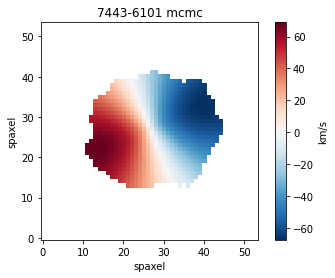

In [26]:
fitted_map_mcmc = rot_incl_iso(gshape, scale, np.ndarray.tolist(samples_mean))
fitted_map_mcmc = ma.array(fitted_map_mcmc,mask=data_maps['Ha_vel_mask'])
iso_map_minimize = plt.imshow(fitted_map_mcmc, origin='lower',cmap='RdBu_r')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
cbar = plt.colorbar(iso_map_minimize)
cbar.set_label('km/s')
plt.title('7443-6101 mcmc')

Text(0.5, 1.0, '7443-6101 mcmc res')

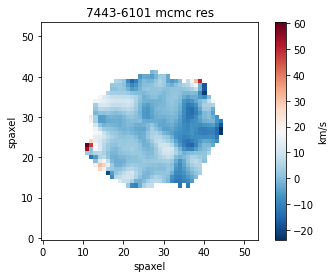

In [27]:
residual_mcmc = data_map - fitted_map_mcmc
residual_mc = plt.imshow(residual_mcmc, origin='lower',cmap='RdBu_r')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
cbar = plt.colorbar(residual_mc)
cbar.set_label('km/s')
plt.title('7443-6101 mcmc res')

Text(0.5, 1.0, '7443-6101 minimize')

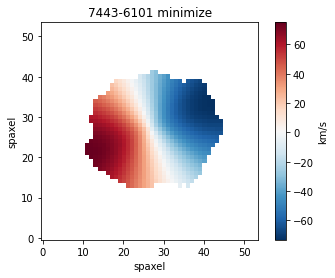

In [28]:
fitted_map_minimize = rot_incl_iso(gshape, scale, mini_soln_iso)
fitted_map_minimize = ma.array(fitted_map_minimize,mask=data_maps['Ha_vel_mask'])
iso_map_minimize = plt.imshow(fitted_map_minimize, origin='lower',cmap='RdBu_r')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
cbar = plt.colorbar(iso_map_minimize)
cbar.set_label('km/s')
plt.title('7443-6101 minimize')

Text(0.5, 1.0, '7443-6101 minimize res')

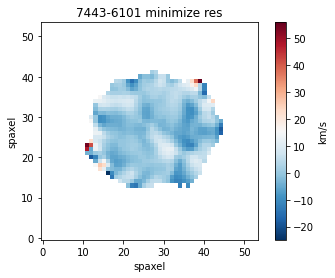

In [29]:
residual_minimize = data_map - fitted_map_minimize
residual_mini = plt.imshow(residual_minimize, origin='lower',cmap='RdBu_r')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
cbar = plt.colorbar(residual_mini)
cbar.set_label('km/s')
plt.title('7443-6101 minimize res')

# Calculating chi2 MCMC

In [30]:
nd_iso_mcmc = np.sum(~fitted_map_mcmc.mask)

# chi2_iso = np.nansum((vmasked - vmap_iso) ** 2 * Ha_vel_ivar)
chi2_iso_mcmc = ma.sum(data_maps['Ha_vel_ivar'] * (data_map - fitted_map_mcmc) ** 2)

# chi2_iso_norm = chi2_iso/(nd_iso - 8)
chi2_iso_norm_mcmc = chi2_iso_mcmc / (nd_iso_mcmc - len(samples_mean))
chi2_iso_norm_mcmc

4.916806864064603

In [31]:
nd_iso_minimize = np.sum(~fitted_map_minimize.mask)

# chi2_iso = np.nansum((vmasked - vmap_iso) ** 2 * Ha_vel_ivar)
chi2_iso_minimize = ma.sum(data_maps['Ha_vel_ivar'] * (data_map - fitted_map_minimize) ** 2)

# chi2_iso_norm = chi2_iso/(nd_iso - 8)
chi2_iso_norm_minimize = chi2_iso_minimize / (nd_iso_minimize - len(mini_soln_iso))
chi2_iso_norm_minimize

4.015360158352961

# NFW

In [ ]:
bad_samples_NFW = np.load("bad_samples_NFW.npy")
bad_samples_NFW

In [ ]:
ns_NFW, nw_NFW, nd_NFW = bad_samples_NFW.shape
ns_NFW, nw_NFW, nd_NFW

In [ ]:
flat_bad_samples_NFW = bad_samples_NFW.reshape(ns_NFW*nw_NFW, nd_NFW)
flat_bad_samples_NFW

In [ ]:
mini_soln_NFW = [np.log10(5.315237789),0.1472824,417.348003,11.71427151,0.003456733,20.53074275,0.865871265,1.969515296,25.83823628,27.65695241,4.516715936]

In [ ]:
pos_NFW = np.array(mini_soln_NFW) + np.random.uniform(low=-1e-3*np.ones(len(mini_soln_NFW)), high=1e-3*np.ones(len(mini_soln_NFW)), size=(64,11))

In [ ]:
nwalkers_NFW, ndim_NFW = pos_NFW.shape
nwalkers_NFW, ndim_NFW

In [ ]:
fig_NFW, axes_NFW = plt.subplots(11,1, figsize=(20, 20), sharex=True,
                         gridspec_kw={'hspace':0.1})

for i in range(ndim_NFW):
    ax = axes_NFW[i]
    ax.plot(bad_samples_NFW[:10000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,10000),ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

In [ ]:
corner.corner(flat_bad_samples_NFW, labels=labels,
                    range=[(-7,2), (0,5), (0,2000),(1,20),(0.0001,0.01),(5,200),(0,0.436*np.pi),(0,2*np.pi),(20,40),(20,40),(-100,100)], bins=30,smooth=1,
                    truths=mini_soln_NFW, 
                    truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
                    quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True)
plt.savefig('corner_NFW.png',format='png')

In [ ]:
good_walkers_NFW = np.load("good_walkers_NFW.npy")
bad_samples_NFW = bad_samples_NFW[:,good_walkers_NFW,:]

In [ ]:
fig_NFW, axes_NFW = plt.subplots(11,1, figsize=(20, 14), sharex=True,
                         gridspec_kw={'hspace':0.1})

for i in range(ndim_NFW):
    ax = axes_NFW[i]
    ax.plot(bad_samples_NFW[:10000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,10000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

In [ ]:
flat_bad_samples_NFW = bad_samples_NFW.reshape(ns_NFW*nw_NFW, nd_NFW)

In [ ]:
import cython

In [ ]:
from galaxy_component_functions_cython import bulge_vel,halo_vel_iso

In [ ]:
r = np.linspace(0.001,30,1000)

In [ ]:
vel_list = []
for i in range(len(r)):
    vel_list.append(bulge_vel(r[i]*1000,np.log10(.5),0.5*1000))
vel_list

In [ ]:
plt.plot(r,vel_list)

In [ ]:
vel_list = []
for i in range(len(r)):
    vel_list.append(halo_vel_iso(r[i]*1000,0.0051,*1000))
vel_list

In [ ]:
plt.plot(r,vel_list)

In [ ]:
from galaxy_component_functions import bulge_vel

In [ ]:
plt.plot(r,bulge_vel(r*1000,100,0.01*1000))

In [ ]:
from 